## Telco Churn EDA

#### Intro
Customer churn is the term used when a customer simply ceases to be a customer. They stop doing business with a company or discontinue their subscription. Knowing why customers might stop purchasing your goods and services is integral to any business.

The dataset within this depository contains information about customers who cancelled their subscriptions with Telco, a telecommunications company. Telco sells a variety of services and offers subscriptions in various kinds of contracts. I intend to examine the features of the data set in order to determine the main factors causing customers to cease doing business with Telco.

This notebook is an exploratory analysis of the data. The second notebook (Part 2 – Telco Churn Modelling) will make use of predictive models to further understand what is driving customer churn.

Data Source: https://www.ibm.com/communities/analytics/watson-analytics-blog/predictive-insights-in-the-telco-customer-churn-data-set/

#### Features
customerID: Customer ID

gender: Whether the customer is a senior citizen or not (1, 0)

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

Partner: Whether the customer has a partner or not (Yes, No)

Dependents: Whether the customer has dependents or not (Yes, No)

tenure: Number of months the customer has stayed with the company

PhoneService: Whether the customer has a phone service or not (Yes, No)

MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract: The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

PaymentMethod: The customer’s payment method

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

Churn: Whether the customer churned or not (Yes or No)

In [26]:
#preliminary module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data
df = pd.read_csv('./Telco data.csv')

#### Initial Exploration

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.describe(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3039-MJSLN,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


Data types aren’t ideal for some features e.g. SeniorCitizen and TotalCharges

Many of the categorical variables are binary

At first glance there are no missing values (though TotalCharges could have abnormalities since it wasn’t recognised as a numerical feature)

#### Data clean up

In [11]:
#Convert SeniorCitizen
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1:'Yes',0:'No'})

In [12]:
#drop customerID
df.drop('customerID', axis=1,inplace = True)

In [15]:
#Convert TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
print('TotalCharges missing values: {}'.format(df['TotalCharges'].isna().sum()))

TotalCharges missing values: 11


There were indeed missing values for TotalCharges (non numeric values)

We'll decide what to do about the missing values once we understand more about the data

In [16]:
#Examine values
for col in df.columns:
    if df[col].nunique() <21:
        print(str(col).ljust(17) + ': {} ITEMS - {} '.format(df[col].nunique(),df[col].unique()))
    else:
        print(str(col).ljust(17) + ': {} ITEMS.....'.format(df[col].nunique()))

gender           : 2 ITEMS - ['Female' 'Male'] 
SeniorCitizen    : 2 ITEMS - ['No' 'Yes'] 
Partner          : 2 ITEMS - ['Yes' 'No'] 
Dependents       : 2 ITEMS - ['No' 'Yes'] 
tenure           : 73 ITEMS.....
PhoneService     : 2 ITEMS - ['No' 'Yes'] 
MultipleLines    : 3 ITEMS - ['No phone service' 'No' 'Yes'] 
InternetService  : 3 ITEMS - ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity   : 3 ITEMS - ['No' 'Yes' 'No internet service'] 
OnlineBackup     : 3 ITEMS - ['Yes' 'No' 'No internet service'] 
DeviceProtection : 3 ITEMS - ['No' 'Yes' 'No internet service'] 
TechSupport      : 3 ITEMS - ['No' 'Yes' 'No internet service'] 
StreamingTV      : 3 ITEMS - ['No' 'Yes' 'No internet service'] 
StreamingMovies  : 3 ITEMS - ['No' 'Yes' 'No internet service'] 
Contract         : 3 ITEMS - ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling : 2 ITEMS - ['Yes' 'No'] 
PaymentMethod    : 4 ITEMS - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
Mon

What is 'no internet/phone service'? looks unnecessary since one variable already makes that clear.

In [18]:
#see values again but subset of where 'InternetService' !='No'
for col in df.columns:
    if df[col].nunique() <21:
        print(str(col).ljust(17) + ': {} ITEMS - {} '.format(df[df['InternetService'] != 'No'][col].nunique(),df[df['InternetService'] != 'No'][col].unique()))
    else:
        print(str(col).ljust(17) + ': {} ITEMS.....'.format(df[col].nunique()))

gender           : 2 ITEMS - ['Female' 'Male'] 
SeniorCitizen    : 2 ITEMS - ['No' 'Yes'] 
Partner          : 2 ITEMS - ['Yes' 'No'] 
Dependents       : 2 ITEMS - ['No' 'Yes'] 
tenure           : 73 ITEMS.....
PhoneService     : 2 ITEMS - ['No' 'Yes'] 
MultipleLines    : 3 ITEMS - ['No phone service' 'No' 'Yes'] 
InternetService  : 2 ITEMS - ['DSL' 'Fiber optic'] 
OnlineSecurity   : 2 ITEMS - ['No' 'Yes'] 
OnlineBackup     : 2 ITEMS - ['Yes' 'No'] 
DeviceProtection : 2 ITEMS - ['No' 'Yes'] 
TechSupport      : 2 ITEMS - ['No' 'Yes'] 
StreamingTV      : 2 ITEMS - ['No' 'Yes'] 
StreamingMovies  : 2 ITEMS - ['No' 'Yes'] 
Contract         : 3 ITEMS - ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling : 2 ITEMS - ['Yes' 'No'] 
PaymentMethod    : 4 ITEMS - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
MonthlyCharges   : 1585 ITEMS.....
TotalCharges     : 6530 ITEMS.....
Churn            : 2 ITEMS - ['No' 'Yes'] 


In [19]:
#see values again but subset of where 'PhoneService' !='No'
print(df[df['PhoneService']!='No']['MultipleLines'].unique())

['No' 'Yes']


No need for 'no internet/phone service', replace with 'No'

In [20]:
df = df.replace({'No phone service':'No','No internet service':'No'})

If we want to retrieve that information again we can do that by engineering interactions between the features.

#### Examination of numeric variables

In [21]:
dfNum = df.select_dtypes([np.float64,np.int64])

Distributions checks

tenure               AxesSubplot(0.125,0.536818;0.352273x0.343182)
MonthlyCharges    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
TotalCharges            AxesSubplot(0.125,0.125;0.352273x0.343182)
dtype: object

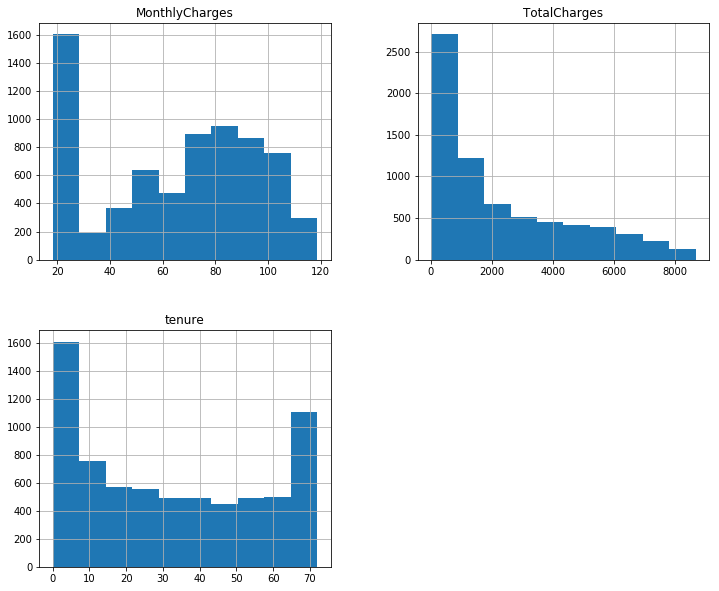

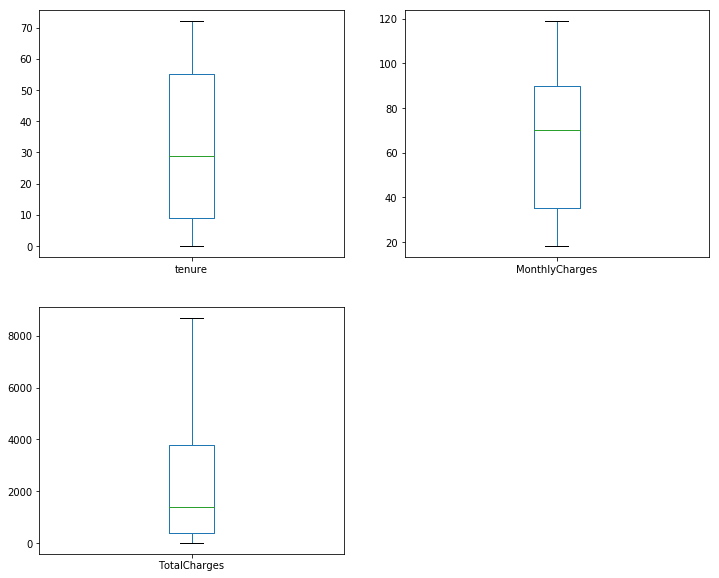

In [22]:
dfNum.hist(figsize = (12,10))
dfNum.plot(kind= 'box' , subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12,10))

Distributions are somewhat positively skewed. This is due to the large spike in the first bin present in each feature. This may indicate that many customers try out the service and then quit.

Tenure is bimodal. There are two peaks at the start and the end of the distribution. It seems Telco does enjoy a segment of customers that are loyal.

Interestingly TotalCharges is not also bimodal. This could mean that the long term customers are paying lower rates in general.

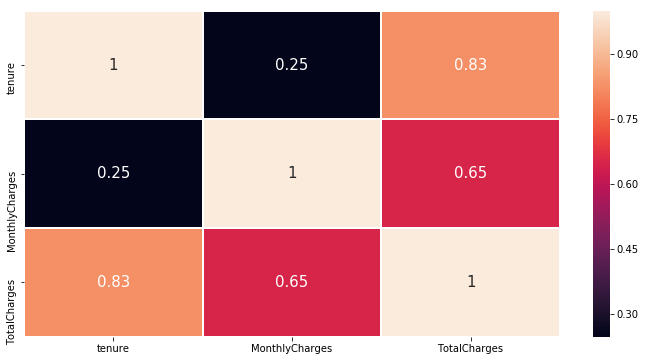

In [23]:
#correlations
plt.figure(figsize = (12,6)); sns.heatmap(dfNum.corr(), linewidths=1, annot = True, annot_kws={"size": 15})

The strong positive correlation between TotalCharges and tenure makes sense. Perhaps we could drop one of these features since they roughly say the same thing.

Due to this correlation I feel that it we could fill the missing TotalCharges values with a regression model based on tenure.

A moderate correlation exists between MonthlyCharges and TotalCharges. Perhaps customers start to buy more services the longer they stay.

I feel the need to engineer a new feature then. A feature that represents the number of services a customer uses.

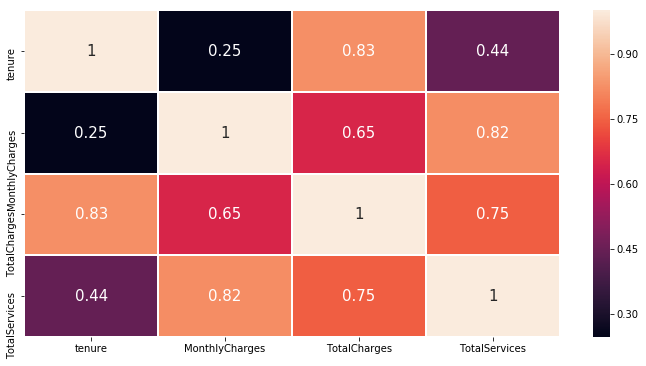

In [24]:
df['TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] != 'No').sum(axis=1)
dfNum = df.select_dtypes([np.float64,np.int64])
plt.figure(figsize = (12,6)); sns.heatmap(dfNum.corr(), linewidths=1, annot = True, annot_kws={"size": 15})

TotalServices is less correlated with Tenure than TotalCharges. People buying the more expensive services typically have longer tenure than those who buy many services.

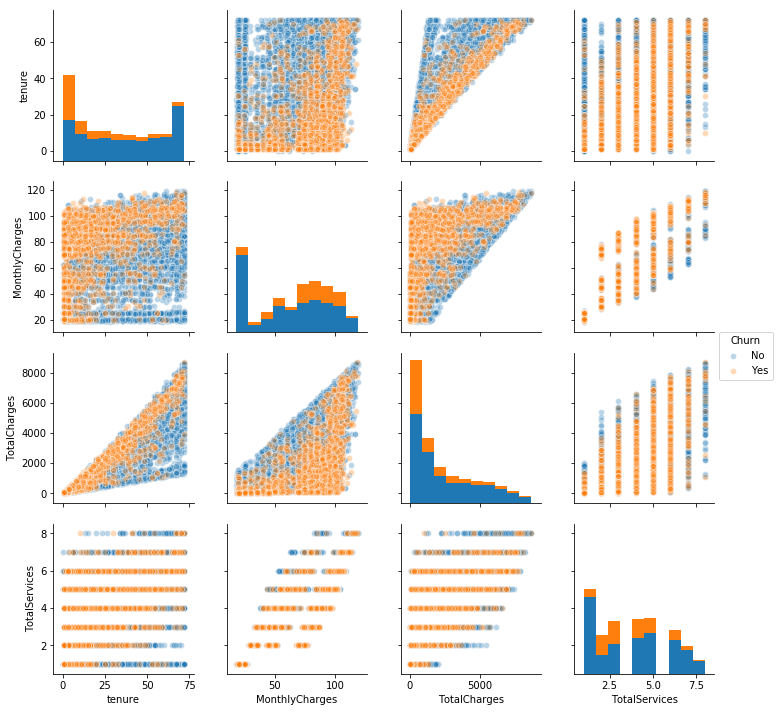

In [27]:
#add in churn and check scatters
dfNum['Churn'] = df['Churn']
sns.pairplot(dfNum, hue = 'Churn', plot_kws = dict(alpha=0.3))

At a glance it’s difficult to tell the impact any of these features have on churn

When Tenure and TotalCharges are very low we see more instances of churn.

Higher monthly charges also have more instances of churn

The tenure x TotalCharges scatter seems to be showing that longstanding customers that have not spent a lot on services are unlikely to churn.

In [28]:
#### Examination of categorical variables

In [31]:
dfCat = df.select_dtypes(object)

Churn distribution

Churn Distribution

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


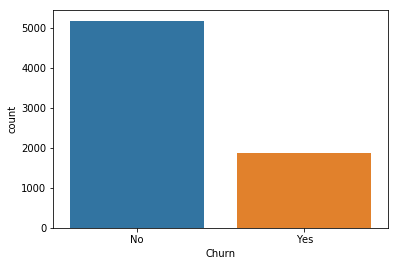

In [32]:
print('Churn Distribution\n')
print(df['Churn'].value_counts()/len(df))
sns.countplot(x='Churn', data = dfCat)

We see here that our data set is quite imbalanced. One quarter of our data set is made up of customers who left Telco as a customer.

Let's take a look at the distribution of Churn across the categorical features. If Yes:No isn't 1:3 then that feature may have an impact on Churn.

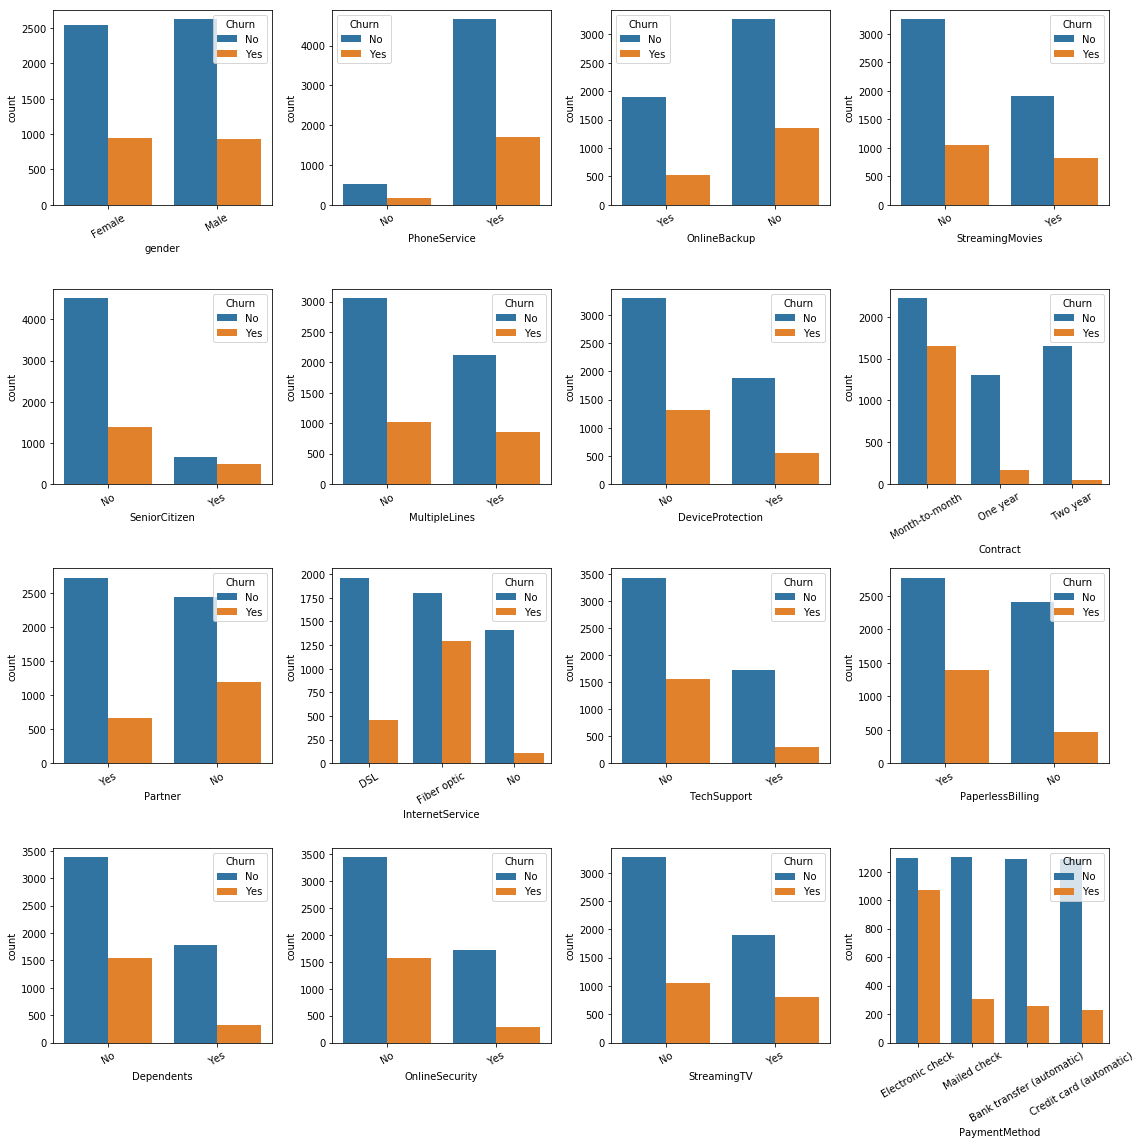

In [33]:
f, axes = plt.subplots(4,4,figsize=(16,16))
for i in range(len(dfCat.columns[:-1])):
    sns.countplot(x=dfCat.columns[i], hue = 'Churn', data = dfCat, ax = axes[i%4,int(i/4)])
    axes[i%4,int(i/4)].tick_params(axis = 'x', labelrotation=30)
f.tight_layout()

There are a handful of features that don’t have the 1:3 imbalance.

We see higher instances of Churn in the customers that stream movies a highly competitive sector. 

Senior citizens are also more likely to leave.

Month-to-Month customers are far more likely to leave since they have the flexibility to do so.

Customers without partners have higher Churn rates.

Fiber-optic customers are much more likely to leave than DSL and No internet customers.

Those that do not have Tech support have higher instances of Churn.

Customers that utilise paperless billing are slightly more likely to leave.

Similar to customers without partners it seems that those with no dependents have higher churn rates.

People paying by electronic check have a very high churn rate.

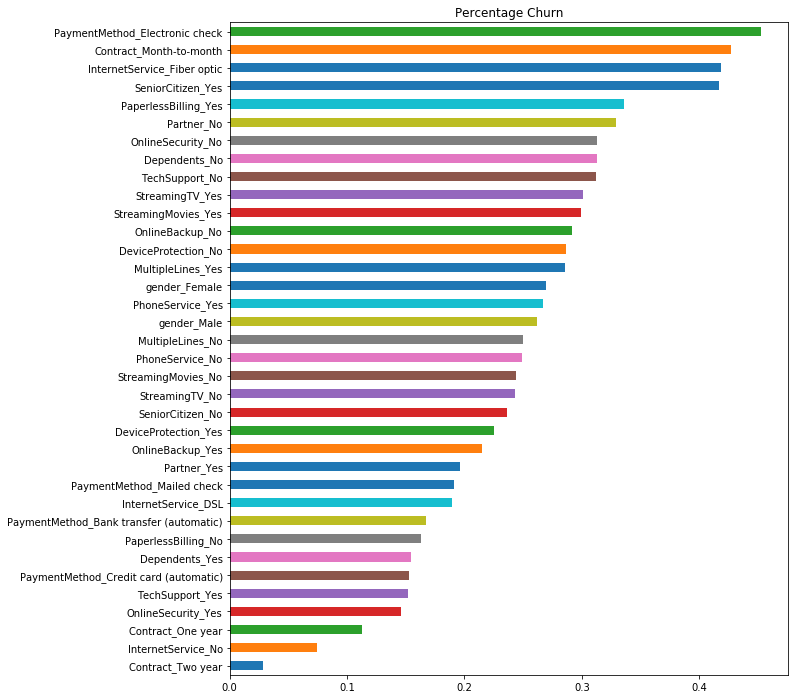

In [35]:
dums = pd.get_dummies(dfCat.iloc[:,:-1])
perc = {}
for col in dums.columns:
    perc[col] = len(dums[col][dums[col]==1][dfCat['Churn']=='Yes'])/len(dums[col][dums[col]==1])
    
perc_yes = pd.Series(perc)   
perc_yes.sort_values(inplace=True)
perc_yes.plot.barh(title='Percentage Churn', figsize = (10,12))

This chart confirms what was said earlier but now we can see the features/items ranked more clearly.

One & Two year contracts, no internet service and having online security reduces churn rates .

#### Even though this is an EDA I cant help but sneak in a regression tree so that feature impact on Churn can be further visualised. 
Code is sloppy but should still present us with a revealing tree

In [36]:
#Fill missing TotalCharges with linear regression model predictions
from sklearn.linear_model import LinearRegression
X = df[~df['TotalCharges'].isna()]['tenure']
y = df[~df['TotalCharges'].isna()]['TotalCharges']
lr = LinearRegression()
lr.fit(X.values.reshape(-1,1),y)
TC_preds = lr.predict(df['tenure'][df['TotalCharges'].isna()].values.reshape(-1,1))
df['TotalCharges'][df['TotalCharges'].isna()] = TC_preds
dfNum = df.select_dtypes([np.float64,np.int64])

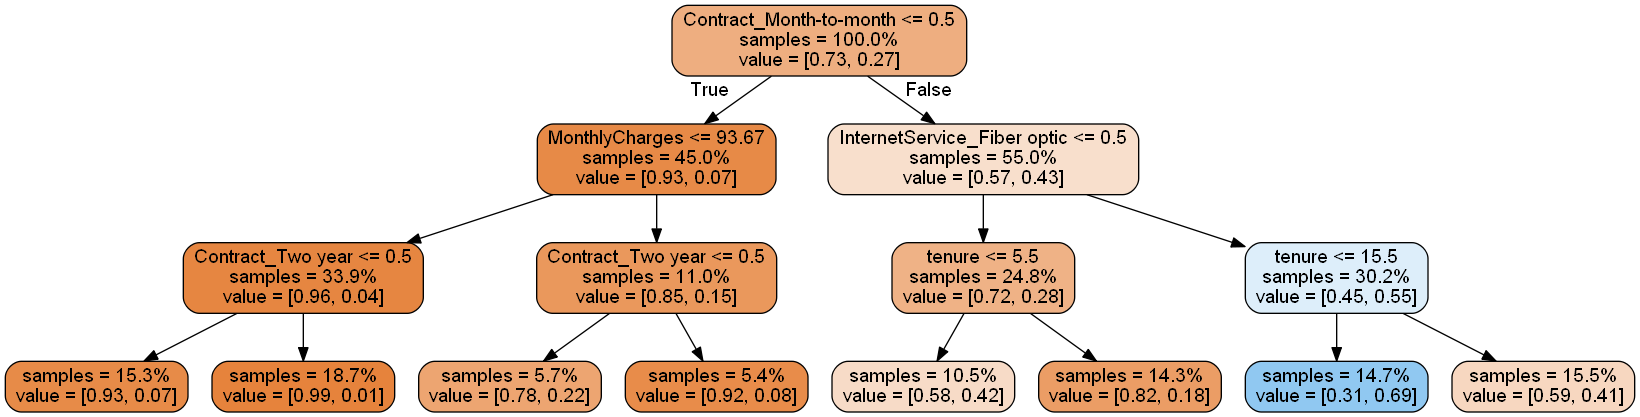

In [37]:
#Make tree
df2 = pd.concat((dums, dfNum), axis =1)
df2['Churn'] = df['Churn'].replace({'Yes':1,'No':0})
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

from sklearn.tree import DecisionTreeClassifier

rTree = DecisionTreeClassifier(max_depth=3)
rTree.fit(df2.drop('Churn', axis=1),df2['Churn'])

dot_data = StringIO()  
export_graphviz(rTree, out_file=dot_data,feature_names=df2.drop('Churn', axis=1).columns ,filled=True, rounded = True, proportion = True, precision = 2, impurity = False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

Month to month contracts, fiber optics and low tenure all point to increased instances of churn.
There is less churn amongst customers who have lower monthly charges and two year contracts.

In [38]:
#Write ammended data frame to csv (we filled in TotalCharges missing values using linear regression on tenure)
#df.to_csv('./Telco data TC fix.csv', index=False)